# Building Spatial Data

Compiling spatial data from raw Latitude/Longitude coordinate pairs sometimes is tedious and error-prone, especially for social scientists without much background in GIS. This example will guide you on how to convert raw Latitude/Longitude coordinate pairs data to spatial data using our function `df_to_gdf`.

The data we are using is making-up Latitude/Longitude coordinate pairs of Person 1 (P1) and Person 2 (P2) in Pennsylvania, USA from 2020-01-01 to 2020-08-01. See [here](https://github.com/shuai-zhou/gps2space/blob/master/notebooks/createdata.ipynb) for information about how we compile the data. You can download all the data we will be using from this [GitHub Repository](https://github.com/shuai-zhou/gps2space/tree/master/data). Make sure the directory is your own working directory when implementing the following steps.

To begin with, we need to import libraries we will be using to read and manipulate data.

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Now, we load our data example.

In [2]:
df = pd.read_csv('../data/example.csv')
df.head()

,pid,timestamp,latitude,longitude
0,P2,2020-04-27 10:42:22.162176000,40.993799,-76.669419
1,P2,2020-06-02 01:12:45.308505600,39.946904,-78.926234
2,P2,2020-05-08 23:47:33.718185600,41.237403,-79.252317
3,P2,2020-04-26 14:31:12.100310400,41.991390,-77.467769
4,P2,2020-03-31 15:53:27.777897600,41.492674,-76.542921


We import our `geodf` module. The `geodf` module has a function `df_to_gdf` which takes three parameters:

- df: This is the name of your DataFrame
- x: This is the column name of your Longitude
- y: This is the column name of your Latitude

Make sure that you pass your Longitude and Latitude columns to x and y, respectively.

In [3]:
from gps2space import geodf

In [4]:
gdf = geodf.df_to_gdf(df, x='longitude', y='latitude')
gdf.head()

,pid,timestamp,latitude,longitude,geometry
0,P2,2020-04-27 10:42:22.162176000,40.993799,-76.669419,POINT (-76.66942 40.99380)
1,P2,2020-06-02 01:12:45.308505600,39.946904,-78.926234,POINT (-78.92623 39.94690)
2,P2,2020-05-08 23:47:33.718185600,41.237403,-79.252317,POINT (-79.25232 41.23740)
3,P2,2020-04-26 14:31:12.100310400,41.991390,-77.467769,POINT (-77.46777 41.99139)
4,P2,2020-03-31 15:53:27.777897600,41.492674,-76.542921,POINT (-76.54292 41.49267)


Now the data are in spatial format with a geometry column that stores the geographical location information, we can plot the Point GeoDataFrame on the map of Pennsylvania, USA. Please note the spatial data is in WGS84 datum and is not projected.

In [5]:
pa = gpd.read_file('../data/pacounty.shp')

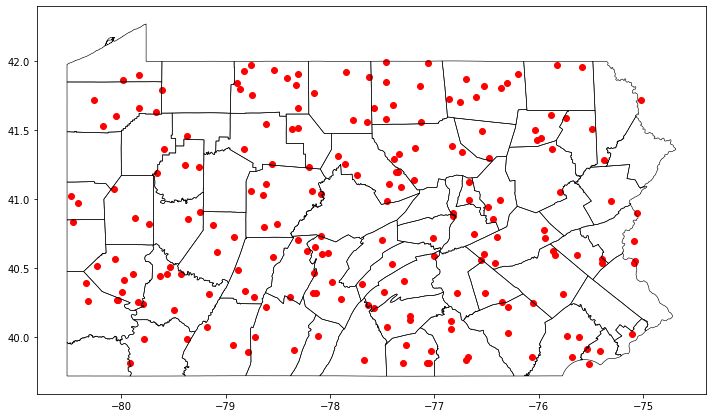

In [6]:
ax = pa.boundary.plot(figsize=(12, 12), edgecolor='black', linewidth=0.6)
gdf.plot(ax=ax, color='r')

plt.show();

We can then save the spatial data to `shp` file.

In [7]:
gdf.to_file('../data/example.shp')